<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/7_3_SpamEmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import re
import spacy
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Loading data**

In [8]:
df=pd.read_csv('spam.csv', encoding="latin-1")

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data cleaning**

In [10]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

In [14]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

<ipython-input-14-d7f0d6ce8bd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'label','v2':'text'},inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
df['label']=oe.fit_transform(df['label'])

<ipython-input-15-92b81e2b8c50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=oe.fit_transform(df['label'])


**EDA**

In [16]:
df['num_characters']=df['text'].apply(lambda x:len(x))

<ipython-input-16-34ae2273662c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(lambda x:len(x))


In [17]:
df['num_words']=df['text'].apply(lambda x: len(word_tokenize(x)))

In [18]:
df['num_sentences']=df['text'].apply(lambda x:len(sent_tokenize(x)))

In [19]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_characters', ylabel='Count'>

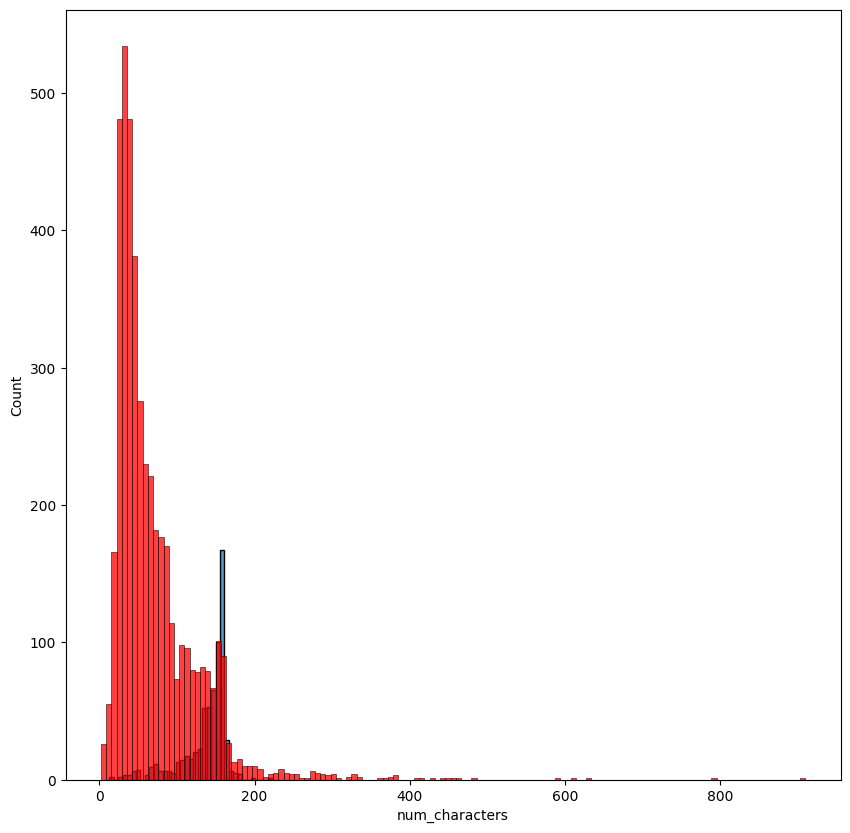

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['label']==1]['num_characters'])
sns.histplot(df[df['label']==0]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

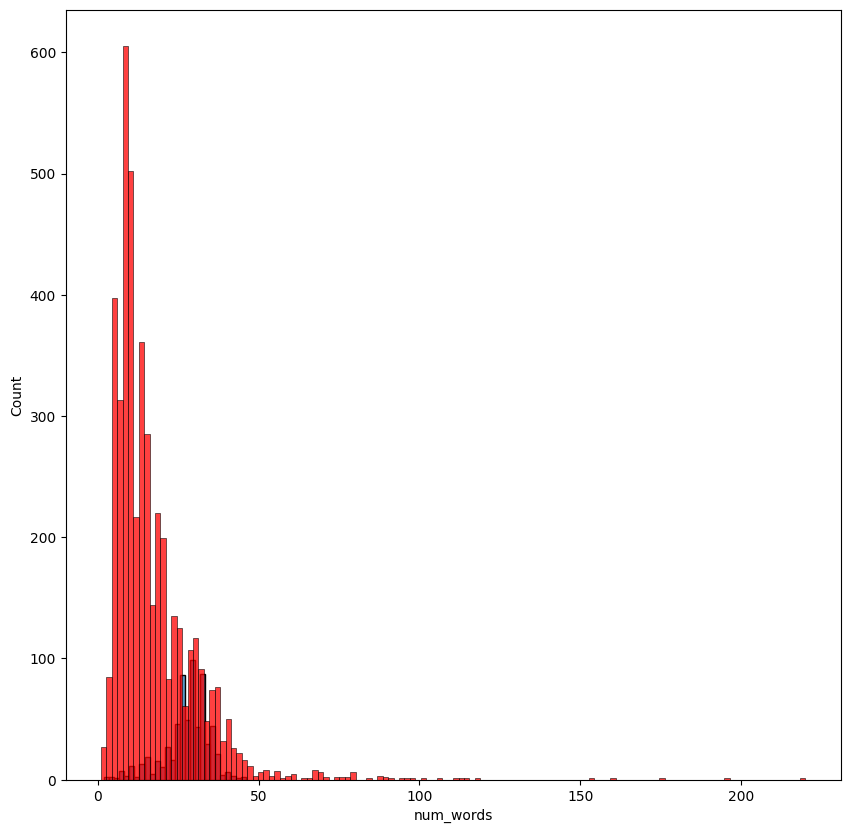

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['label']==1]['num_words'])
sns.histplot(df[df['label']==0]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

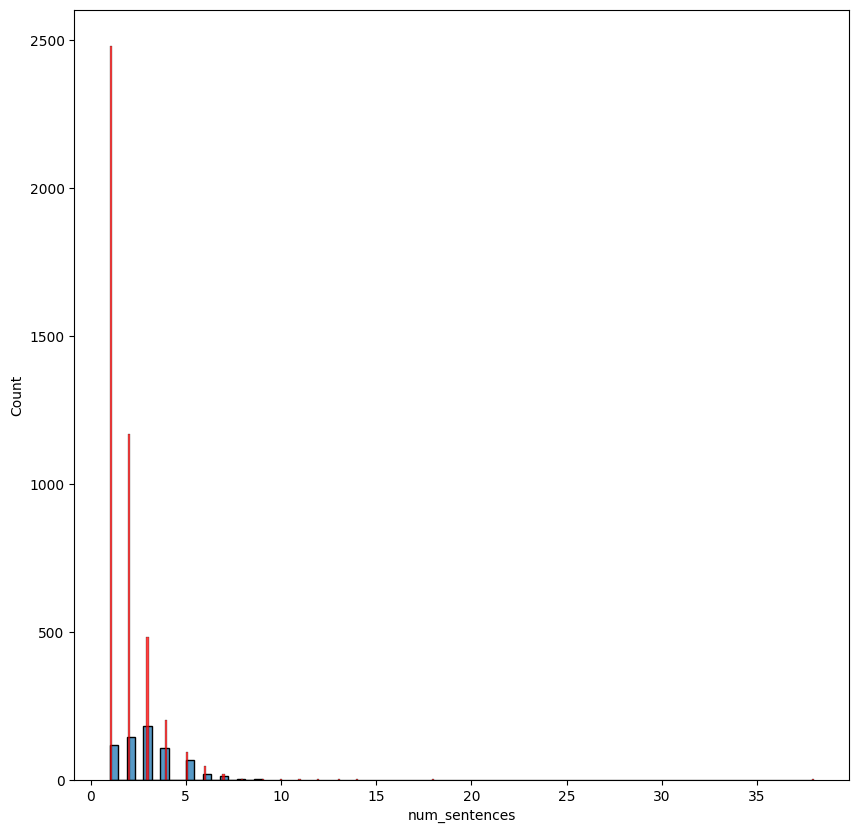

In [22]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['label']==1]['num_sentences'])
sns.histplot(df[df['label']==0]['num_sentences'],color='red')

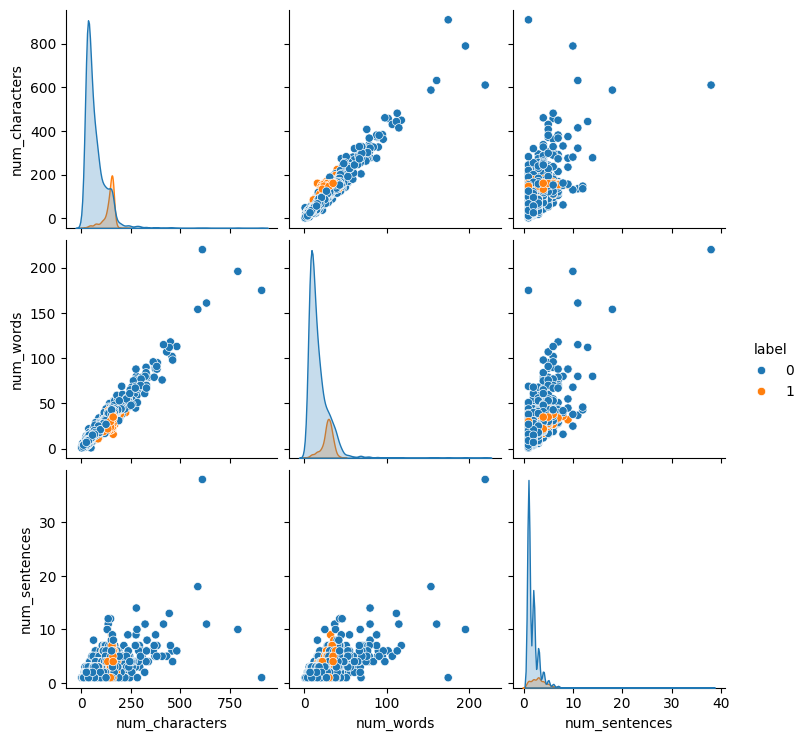

In [23]:
sns.pairplot(df,hue='label')

<ipython-input-24-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

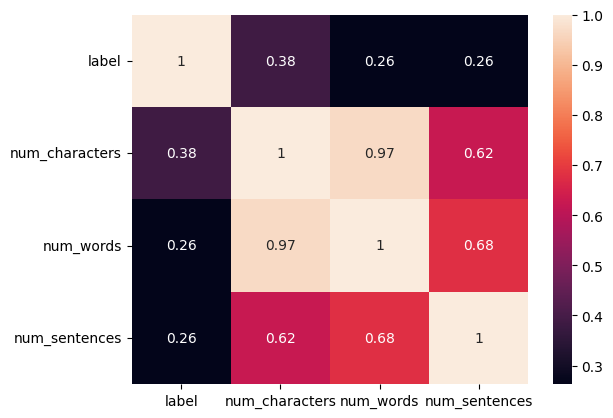

In [24]:
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing**

In [25]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [26]:
nlp=spacy.load("en_core_web_sm")

In [27]:
st1=nlp.Defaults.stop_words
st2=stopwords.words('english')
StopWords=set(set(st1)|set(st2))

In [28]:
lemitizer=WordNetLemmatizer()

In [29]:
len(StopWords)

382

In [30]:
'im' in StopWords

False

In [31]:
ST = pd.read_csv('terrier.txt', sep='\t',header=None)

In [32]:
StopWord=[i for i in ST[0]]

In [33]:
len(StopWord)

733

In [34]:
def cleanText(text):
  text=re.sub("[^A-Za-z0-9]+"," ",text)
  text=text.lower()
  str=[]
  str=[lemitizer.lemmatize(s) for s in text.split() if s not in StopWord]
  str=' '.join(str)
  return str

In [35]:
df['transformed_text']=df['text'].apply(cleanText)

In [36]:
df['text'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

In [39]:
spam_wc

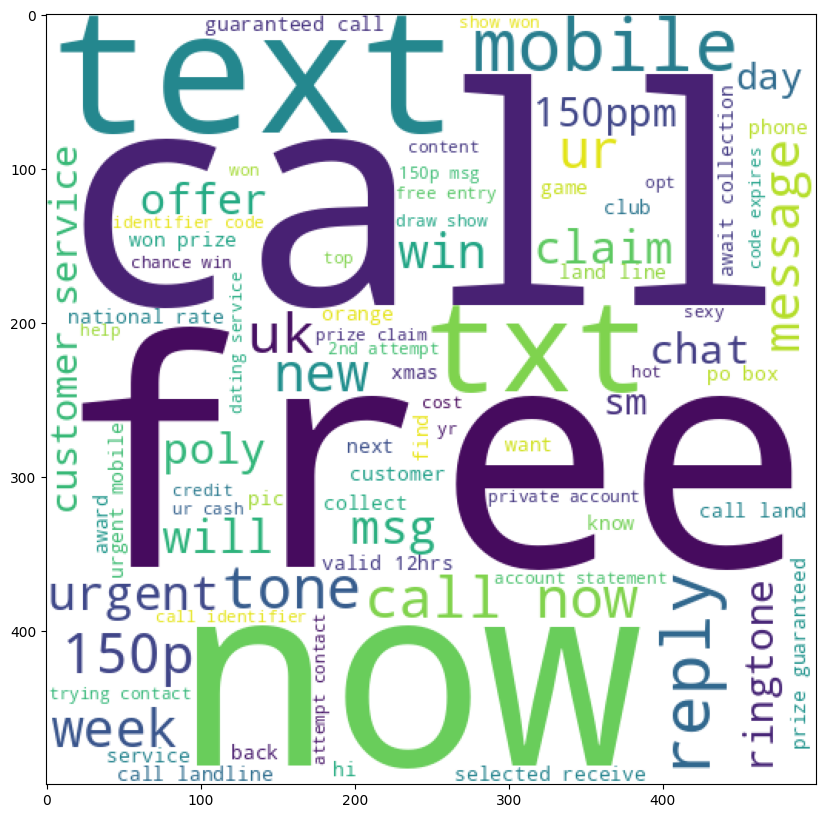

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

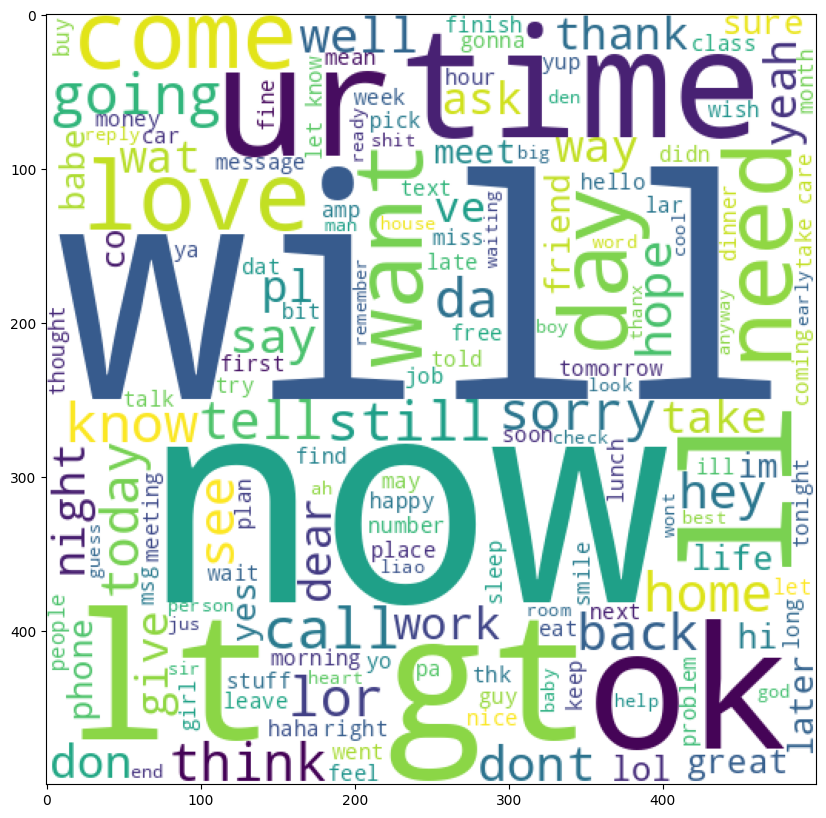

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [43]:
from collections import Counter

In [44]:
spam_corpus=[]
for sen in df[df['label']==1]['transformed_text'].tolist():
   for word in sen.split():
      spam_corpus.append(word)

In [45]:
len(spam_corpus)

11286

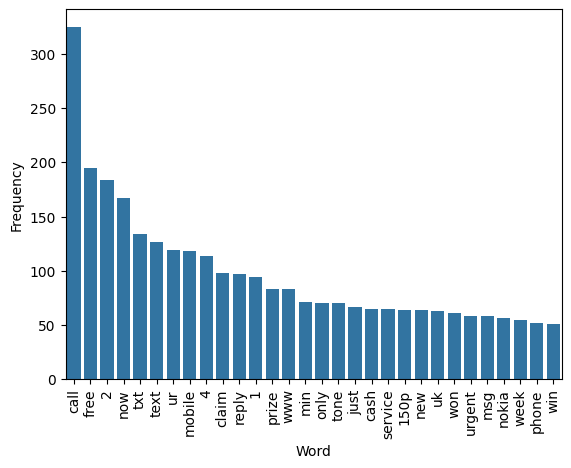

In [46]:
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

**Vectorization**

In [47]:
df

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy only bugis great world la b...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun say early hor say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah don think go usf life here
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact won 750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,will going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying next...


In [49]:
X,y=df['transformed_text'],df['label']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33,stratify=y)

In [52]:
tfidf=TfidfVectorizer(max_features=3000)
tfidf.fit(X_train)

TfidfVectorizer(max_features=3000)

In [53]:
X_train=tfidf.transform(X_train)
X_test=tfidf.transform(X_test)

In [56]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [63]:
precision_score(y_test,y_pred)

0.44794188861985473

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9800703399765534, 0.9595959595959596)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)


    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.964244,0.987421
1,KN,0.906800,0.983051
5,RF,0.973036,0.967033
0,SVC,0.980070,0.959596
8,ETC,0.974209,0.943299
10,xgb,0.968347,0.940217
9,GBDT,0.952521,0.935484
4,LR,0.960727,0.930636
7,BgC,0.967761,0.917098
3,DT,0.940797,0.870968


In [72]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [73]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.964244
1,KN,Accuracy,0.906800
2,RF,Accuracy,0.973036
3,SVC,Accuracy,0.980070
4,ETC,Accuracy,0.974209
5,xgb,Accuracy,0.968347
6,GBDT,Accuracy,0.952521
7,LR,Accuracy,0.960727
8,BgC,Accuracy,0.967761
9,DT,Accuracy,0.940797


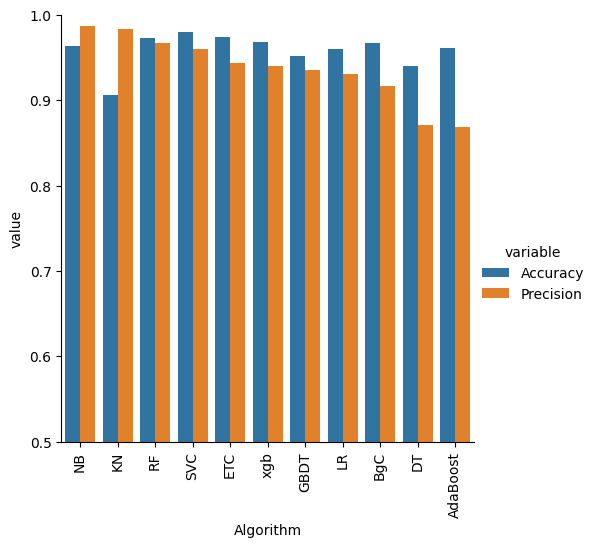

In [74]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()